# Data Cleanup
## Was: Basic Visualizations

Warning message:
“Removed 7310 rows containing missing values (geom_point).”


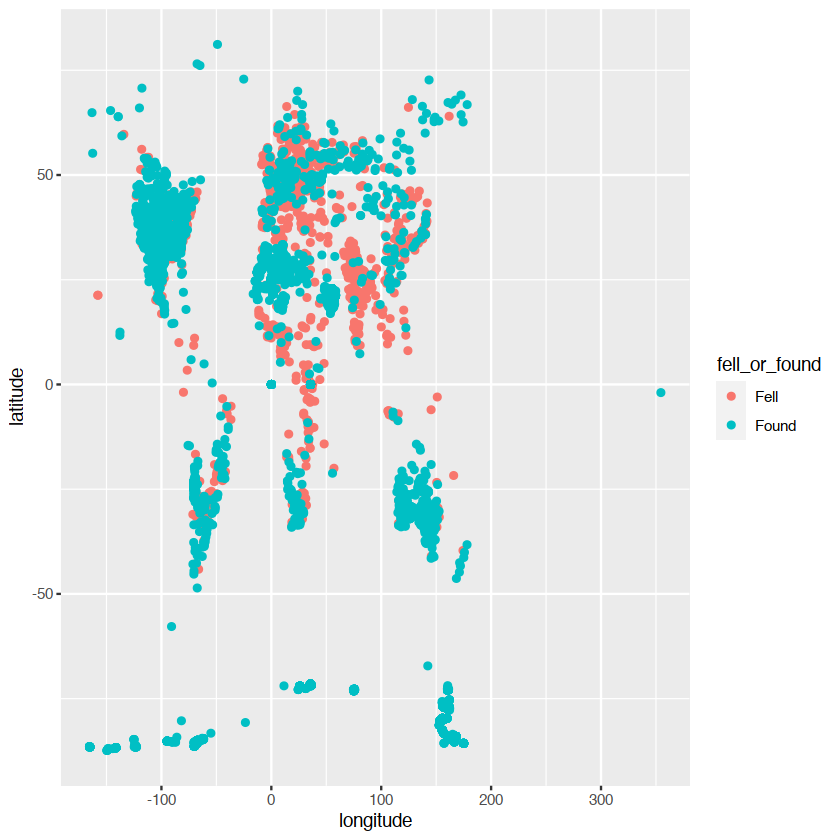

In [1]:
library("ggplot2")

meteorites <- read.csv("data/meteorites.csv")
meteorites <- subset(meteorites, select = -X )   #remove old X column.

#Basic plot of everything...

ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()



In [2]:
#A-ha!  I see a bad geolocation!

baddata <- meteorites[which(meteorites$longitude > 180), ]
baddata

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
22939,Meridiani Planum,32789,Valid,"Iron, IAB complex",NA,Found,2005,-1.94617,354.4733,"(-1.94617, 354.47333)"


In [3]:
# Hmm.... wrong planet! https://en.wikipedia.org/wiki/Meridiani_Planum

# Remove
meteorites <- meteorites[which(meteorites$longitude < 180), ]

# Add to meteorongs
meteorongs <- read.csv("data/meteorongs.csv")
meteorongs <- subset(meteorongs, select = -X )
meteorongs2 <- rbind(meteorongs, baddata)
write.csv(meteorongs2,'data/meteorongs.csv')



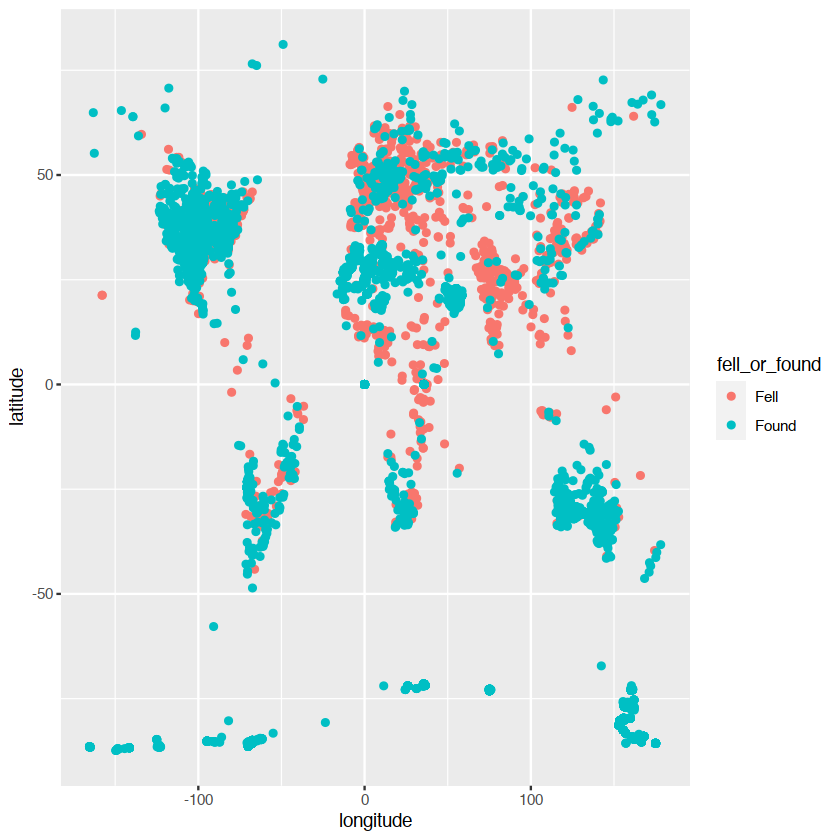

In [4]:
# Redraw
ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()# What about these 

In [5]:
#Better.. but what about the error it gives about rows without a location?

unique_long <- sort(unique(meteorites$longitude))

print(unique_long)

    [1] -165.433330 -165.116670 -163.166670 -162.550000 -157.866670 -157.783330
    [7] -149.500000 -148.550000 -148.000000 -146.266670 -144.300000 -141.500000
   [13] -139.333330 -137.800000 -137.700000 -136.000000 -134.201390 -125.000000
   [19] -124.749500 -124.293860 -124.290040 -124.285070 -124.252790 -124.215600
   [25] -123.972550 -123.969750 -123.965560 -123.913610 -123.848950 -123.835980
   [31] -123.793410 -123.698570 -123.688590 -123.685880 -123.500000 -123.463490
   [37] -123.429240 -123.402830 -123.386140 -123.122910 -123.100000 -123.093650
   [43] -122.969440 -122.962180 -122.961370 -122.952200 -122.928580 -122.924670
   [49] -122.875000 -122.678700 -122.583330 -122.416670 -122.350000 -121.850000
   [55] -121.633330 -121.405000 -120.933330 -120.908060 -120.589420 -120.541670
   [61] -120.000000 -119.876389 -119.830000 -119.758120 -119.500000 -119.300000
   [67] -119.183520 -119.086390 -119.000000 -118.966670 -118.959120 -118.950000
   [73] -118.948720 -118.948080 -118.947

In [6]:
#how many have a long of 0.0?

no_long <- meteorites[ which(meteorites$longitude==0), ]

summary(no_long)

     name                 id          nametype           recclass        
 Length:6214        Min.   :31832   Length:6214        Length:6214       
 Class :character   1st Qu.:40271   Class :character   Class :character  
 Mode  :character   Median :52144   Mode  :character   Mode  :character  
                    Mean   :48885                                        
                    3rd Qu.:54422                                        
                    Max.   :57458                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude   longitude
 Min.   :     0.0   Length:6214        Min.   :1965   Min.   :0   Min.   :0  
 1st Qu.:     7.3   Class :character   1st Qu.:1998   1st Qu.:0   1st Qu.:0  
 Median :    27.8   Mode  :character   Median :2007   Median :0   Median :0  
 Mean   :   419.3                      Mean   :2005   Mean   :0   Mean   :0  
 3rd Qu.:   131.3 

In [7]:
#All of these have (0,0) as their coords.... so probably not found at that location.... in the Atlantic Ocean.

#Since the focus of my study will be on geolocation, I will remove these datapoints

meteorites <- meteorites[ which(meteorites$longitude!=0), ]



In [8]:
# add the rest to the meteorongs

meteorongs3 <- rbind(meteorongs2, no_long)
write.csv(meteorongs3,'data/meteorongs.csv')

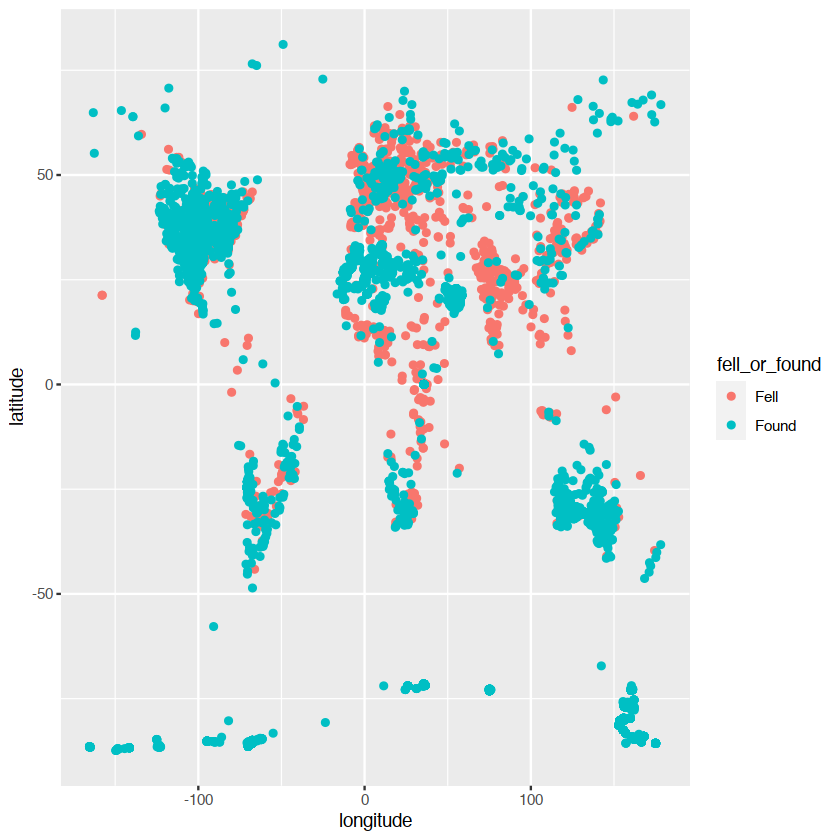

In [9]:
# Redraw
ggplot(meteorites, aes(x=longitude, y=latitude, color =fell_or_found)) + geom_point()# What about these 

In [10]:
#now to check each column for stray issues....

summary(meteorites)


     name                 id          nametype           recclass        
 Length:32116       Min.   :    1   Length:32116       Length:32116      
 Class :character   1st Qu.: 9271   Class :character   Class :character  
 Mode  :character   Median :18636   Mode  :character   Mode  :character  
                    Mean   :20858                                        
                    3rd Qu.:27288                                        
                    Max.   :57455                                        
                                                                         
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:32116       Min.   : 860   Min.   :-87.37  
 1st Qu.:       7   Class :character   1st Qu.:1982   1st Qu.:-79.68  
 Median :      30   Mode  :character   Median :1991   Median :-72.00  
 Mean   :   18531                      Mean   :1987   Mean   :-46.89  
 3rd Qu.:     204                      3rd Qu.:2000  

In [20]:
#there are 69 meteorites that don't have a mass, and 149 that don't have a year.  I will substitute the means for those.

meteorites$mass_in_grams[is.na(meteorites$mass_in_grams)]<-mean(meteorites$mass_in_grams,na.rm=TRUE)
meteorites$year[is.na(meteorites$year)]<-mean(meteorites$year,na.rm=TRUE)


summary(meteorites)

     name                 id          nametype           recclass        
 Length:32116       Min.   :    1   Length:32116       Length:32116      
 Class :character   1st Qu.: 9271   Class :character   Class :character  
 Mode  :character   Median :18636   Mode  :character   Mode  :character  
                    Mean   :20858                                        
                    3rd Qu.:27288                                        
                    Max.   :57455                                        
 mass_in_grams      fell_or_found           year         latitude     
 Min.   :       0   Length:32116       Min.   : 860   Min.   :-87.37  
 1st Qu.:       7   Class :character   1st Qu.:1982   1st Qu.:-79.68  
 Median :      30   Mode  :character   Median :1991   Median :-72.00  
 Mean   :   18531                      Mean   :1987   Mean   :-46.89  
 3rd Qu.:     207                      3rd Qu.:2000   3rd Qu.: 18.45  
 Max.   :60000000                      Max.   :2013   Ma

In [22]:
head(meteorites,10L)
tail(meteorites,10L)

,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
3,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
4,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
5,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
6,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"
7,Adzhi-Bogdo (stone),390,Valid,LL3-6,910,Fell,1949,44.83333,95.16667,"(44.83333, 95.16667)"
8,Agen,392,Valid,H5,30000,Fell,1814,44.21667,0.61667,"(44.21667, 0.61667)"
9,Aguada,398,Valid,L6,1620,Fell,1930,-31.60000,-65.23333,"(-31.6, -65.23333)"


,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
45632,Zerkaly,31354,Valid,H5,16000.0,Found,1956,52.13333,81.96667,"(52.13333, 81.96667)"
45633,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983,24.23333,111.18333,"(24.23333, 111.18333)"
45634,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966,68.00000,128.30000,"(68.0, 128.3)"
45635,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981,31.20000,112.50000,"(31.2, 112.5)"
45636,Zillah 001,31355,Valid,L6,1475.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
45637,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
45638,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)"
45639,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)"
45640,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)"


In [23]:
#this is the final dataset I will be working with!

write.csv(meteorites,'data/meteorites.csv')
